## one way anova

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv')
data.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [3]:
print('This dataset contains {} rows'.format(data.size))

This dataset contains 546 rows


In [4]:
# for missing values
data.gender.unique()

array([' ', '0', '1'], dtype=object)

In [5]:
data[data.gender == ' ']

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0


In [6]:
# % of missing values
print('Missing value percentage of all data: {:.2f}%'.format(data[data.gender == ' '].size / data.size * 100))

Missing value percentage of all data: 2.56%


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


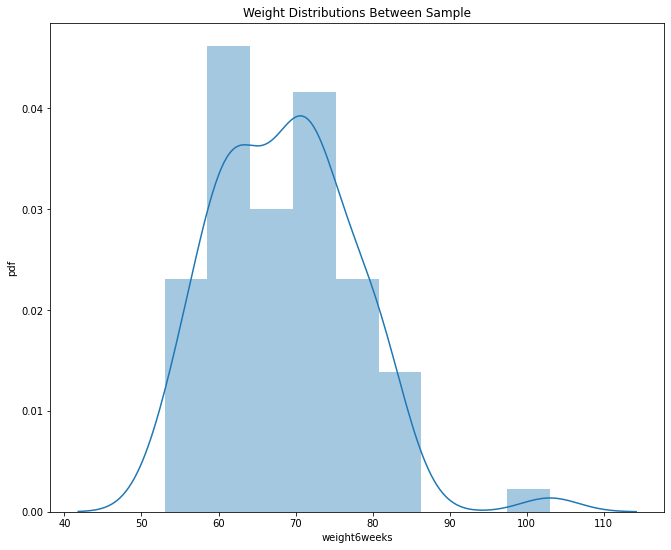

In [8]:
# getting sence of weight distribution
f, ax = plt.subplots(figsize=(11,9))
plt.title('Weight Distributions Between Sample')
plt.ylabel('pdf')
sns.distplot(data.weight6weeks)
plt.show()


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


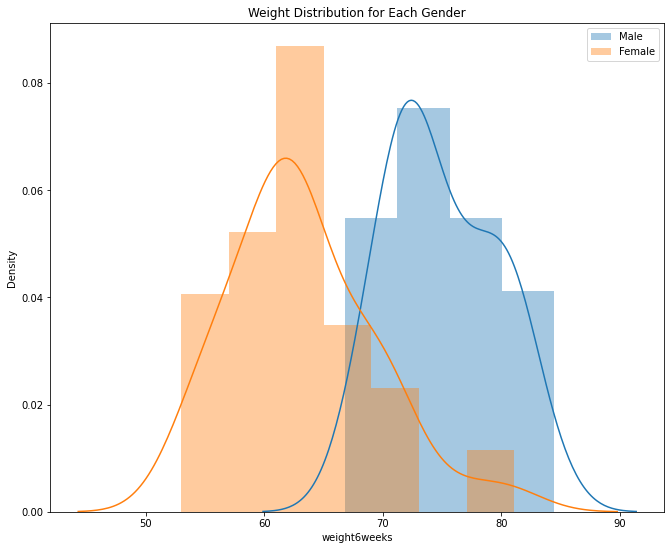

In [9]:
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(data[data.gender == '1'].weight6weeks, ax=ax, label='Male')
sns.distplot(data[data.gender == '0'].weight6weeks, ax=ax, label='Female')
plt.title('Weight Distribution for Each Gender')
plt.legend()

C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

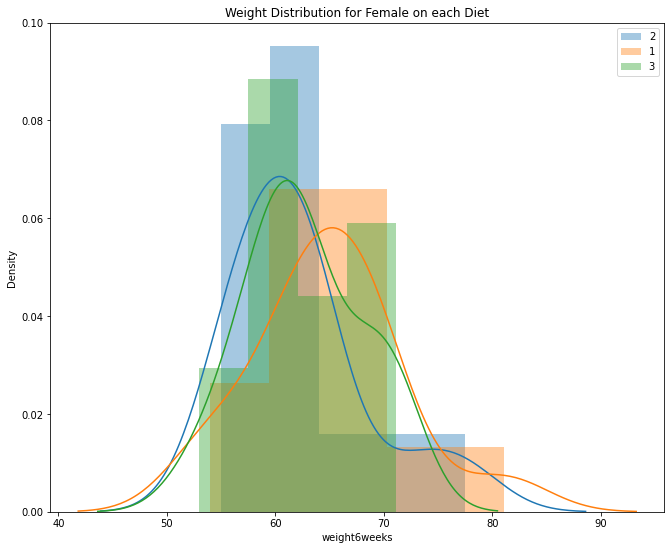

C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

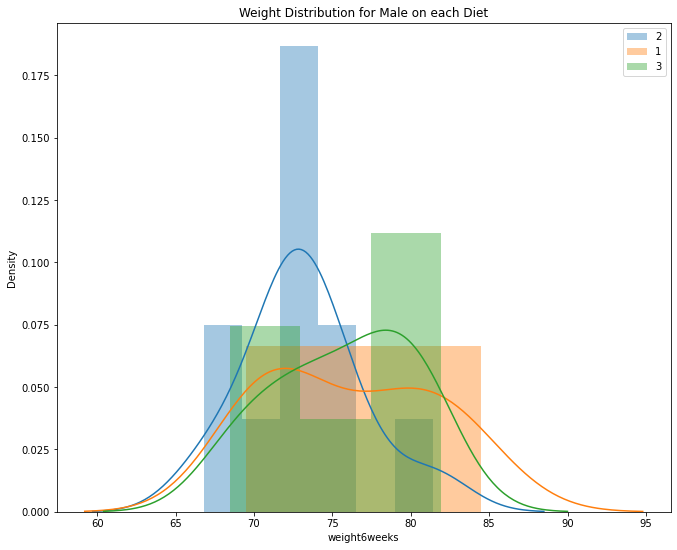

In [10]:
def infer_gender(x):
    if x == '1': 
        return 'Male'
    
    if x == '0':
        return 'Female'
    
    return 'Other'

def show_distribution(df, gender, column, group):
    f, ax = plt.subplots(figsize=(11,9))
    plt.title('Weight Distribution for {} on each {}'.format(gender, column))
    for group_member in group:
        sns.distplot(df[df[column] == group_member].weight6weeks, label='{}'.format(group_member))
    plt.legend()
    plt.show()
    
unique_diet = data.Diet.unique()
unique_gender = data.gender.unique()

for gender in unique_gender:
    if gender != ' ':
        show_distribution(data[data.gender == gender], infer_gender(gender), 'Diet', unique_diet)

In [11]:
data.groupby('gender').agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).weight6weeks

,mean,median,count_nonzero,std
gender,,,,
,81.500000,81.5,2,30.405592
0,63.223256,62.4,43,6.150874
1,75.015152,73.9,33,4.629398


In [12]:
data.groupby(['gender', 'Diet']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).weight6weeks

mean  median  count_nonzero        std
gender Diet                                             
       2     81.500000   81.50              2  30.405592
0      1     64.878571   64.50             14   6.877296
       2     62.178571   61.15             14   6.274635
       3     62.653333   61.80             15   5.370537
1      1     76.150000   75.75             10   5.439414
       2     73.163636   72.70             11   3.818448
       3     75.766667   76.35             12   4.434848

In [13]:
mod = ols('Height ~ Diet', data=data[data.gender=='0']).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)
print()


mod = ols('Height ~ Diet', data=data[data.gender=='1']).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)

ANOVA table for Female
----------------------
               sum_sq    df        F    PR(>F)
Diet       559.680764   1.0  7.17969  0.010566
Residual  3196.086677  41.0      NaN       NaN

ANOVA table for Male
----------------------
               sum_sq    df        F    PR(>F)
Diet        67.801603   1.0  0.43841  0.512784
Residual  4794.259003  31.0      NaN       NaN


In [14]:
# for posthoc analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [15]:
# Only use female data
df = data[data.gender=='0']

# compare the height between each diet, using 95% confidence interval 
mc = MultiComparison(df['Height'], df['Diet'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique diet groups: {}'.format(mc.groupsunique))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -3.5714 0.5452 -11.7865  4.6436  False
     1      3  -8.7714 0.0307 -16.8484 -0.6944   True
     2      3     -5.2 0.2715  -13.277   2.877  False
-----------------------------------------------------
Unique diet groups: [1 2 3]
